In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

: 

In [2]:
plt.figure()
plt.show()

<Figure size 432x288 with 0 Axes>

In [3]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.autolayout'] = True
plt.rcParams['font.size'] = 12

In [4]:
def read_input(pyfan_input):
    df = pd.read_csv(pyfan_input,sep=' ',skiprows=1)
    with open(pyfan_input,'r') as fio:
        print(pyfan_input)
        header = fio.readline().strip().split(' ')[1:]
        fio.close()
    df.columns = header
    return df

In [5]:
pyfan_inputs = {}
# pyfan_inputs['PF'] = read_input('input_H380_TE_PF_smooth.txt')
pyfan_inputs['RANS'] = read_input('/home/msanjose/PYTHON/PyFanNoise/FAN_DATABASE/H380EC01/1-flow_profiles/RANS_H380EC01_5M_CFD_import_2500m3h_rotor_TE.dat')
# intp = {}
# intp['radius'] = np.asarray(pyfan_inputs['PF']['radius'])
# for var in list(tmp.columns):
#     if not var == 'radius':
#         fun = interp1d(tmp['radius'],tmp[var],kind='slinear',fill_value='extrapolate')
#         intp[var] = fun(intp['radius'])
#  = pd.DataFrame(intp)
# del(pyfan_inputs['PF'])

/home/msanjose/PYTHON/PyFanNoise/FAN_DATABASE/H380EC01/1-flow_profiles/RANS_H380EC01_5M_CFD_import_2500m3h_rotor_TE.dat


In [6]:
# for var in pyfan_inputs['RANS'].columns:
#     if not var == 'radius':
#         plt.plot(pyfan_inputs['RANS'][var],pyfan_inputs['RANS']['radius'])
#         if var in ['dpds','ps_dpds']:
#             plt.plot(2*pyfan_inputs['PF'][var],pyfan_inputs['PF']['radius'])
#         else:
#             plt.plot(pyfan_inputs['PF'][var],pyfan_inputs['PF']['radius'])
#     plt.show()

In [7]:
# import phipp_utils_shubhamV3 as phipp_utils
import phipp_utils

In [8]:
def calc_BL_params(df):
    flow_params = dict()
    flow_params['rho_ext'] = df['exterior_density']
    flow_params['U_ext'] = df['exterior_stream_velocity']
    flow_params['delta99'] = df['bl_thickness']
    flow_params['delta_star'] = df['displacement_thickness']
    flow_params['theta'] = df['momentum_thickness']
    flow_params['dpds'] = df['dpds']
    flow_params['tau_wall'] = df['tau_wall']
    flow_params['uv_max'] = df['uv_max']
    return flow_params

In [9]:
frequency = np.logspace(2,5)
omega = 2*np.pi*frequency 

In [10]:
wps_psd = pd.read_csv('psd_AVG_blades_xc085.csv',index_col=0)
list_rad_keys = wps_psd.columns[2:]

In [11]:
idx_radius = [13,25,31,39,44,47]
rad_keys = ['R27pct','R48pct','R62pct','R72pct','R82pct', 'R88pct']
nice_labels_pct = ['25','50','65','75','85','90']

In [12]:
# radius_pct = np.round((pyfan_inputs['RANS']['radius']-0.078)/(0.1915-0.078)*100.0)
# idx_radius = [11,25,38,43,47]
# labels_radius = []
# for idx in idx_radius:
#     mystr = f'R{radius_pct[idx]:.0f}pct'
#     labels_radius.append(mystr)

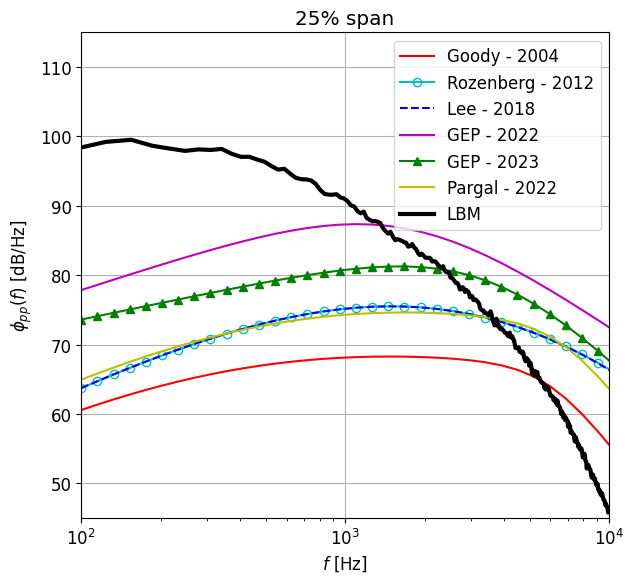

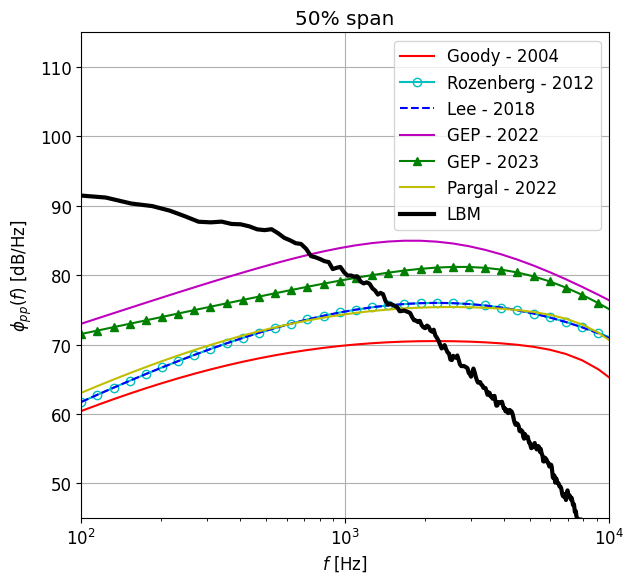

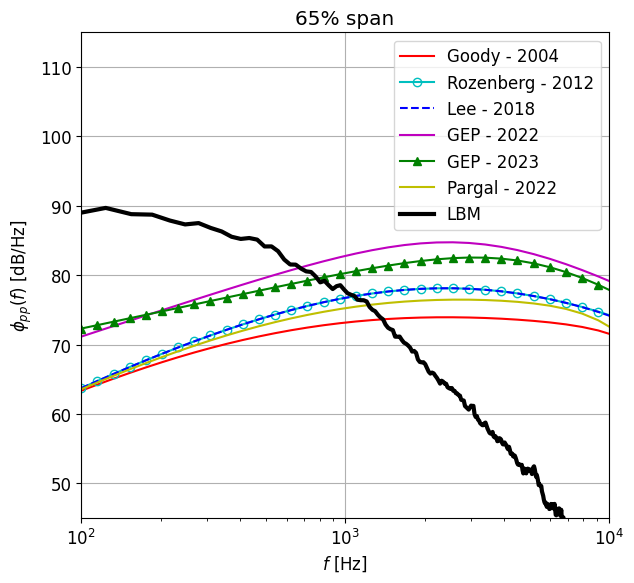

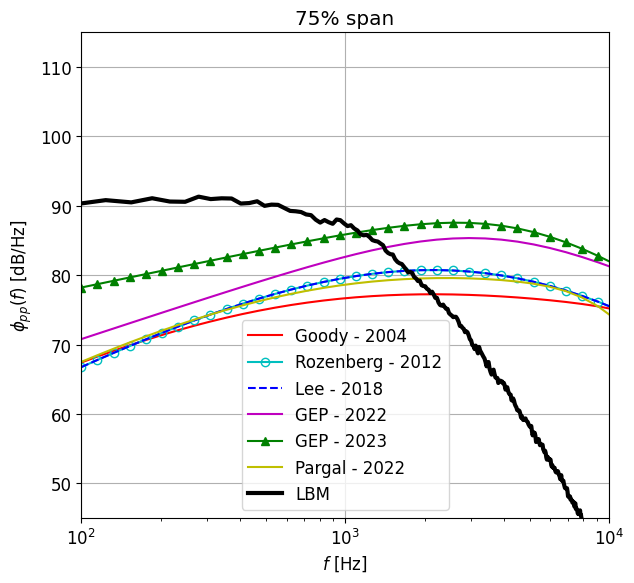

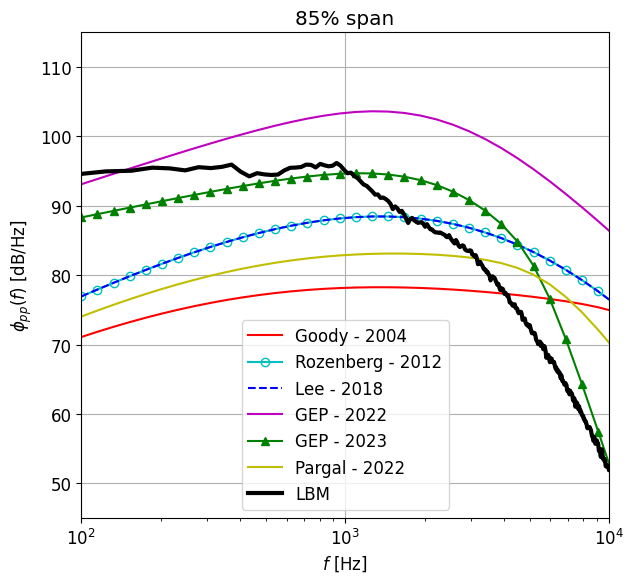

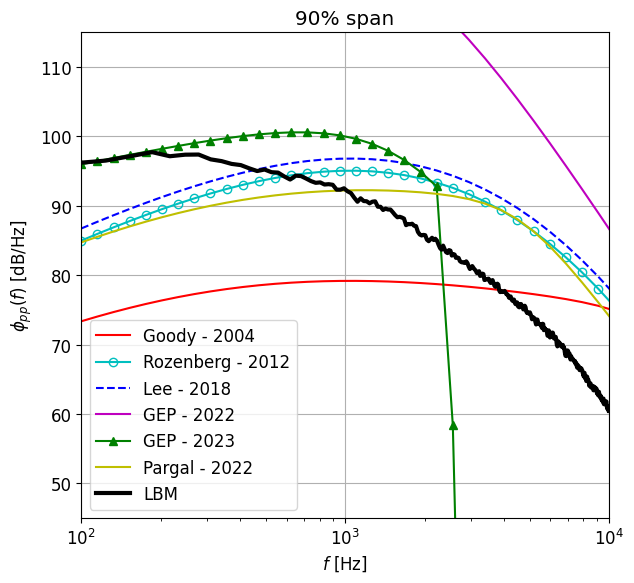

In [26]:
colors = ['red','c','blue','m','green','y']
key_legd = ['Goody - 2004','Rozenberg - 2012','Lee - 2018','GEP - 2022','GEP - 2023','Pargal - 2022']
for istrip,nrad,trad in zip(idx_radius,rad_keys,nice_labels_pct):
    plt.figure(figsize=(6.5,6))
    for zn,ls in zip(pyfan_inputs.keys(),['-','--']):
        for imodel,model in enumerate(['Goody','Rozenberg','Lee','GEP2022','GEP2023','Pargal']):#,'GEP2','GEP3','GEP2-mod']:
            flow_params=calc_BL_params(pyfan_inputs[zn])
            phipp = 2*np.pi*phipp_utils.calc_phipp(istrip,flow_params,omega,model=model)
            
            if model=='Rozenberg':
                plt.plot(frequency,10*np.log10(4*np.pi*phipp/4.0e-10), label=key_legd[imodel],linestyle=ls,
                     color=colors[imodel],marker='o',markerfacecolor='None')
            elif model=='Lee':
                plt.plot(frequency,10*np.log10(4*np.pi*phipp/4.0e-10), label=key_legd[imodel],linestyle='--',
                     color=colors[imodel])
            elif model=='GEP2023':
                plt.plot(frequency,10*np.log10(4*np.pi*phipp/4.0e-10), label=key_legd[imodel],linestyle=ls,
                     color=colors[imodel],marker='^')
            else:
                plt.plot(frequency,10*np.log10(4*np.pi*phipp/4.0e-10), label=key_legd[imodel],linestyle=ls,
                     color=colors[imodel])
    plt.plot(wps_psd['frequency'],wps_psd[nrad], label='LBM',color='black',linestyle='-',linewidth=3.0)
            

    plt.xscale('log')
    plt.xlabel(r'$f$ [Hz]')
    plt.xlim(100,10000)
    plt.ylim(45,115)
    plt.ylabel(r'$\phi_{pp}(f)$ [dB/Hz]')
    plt.grid()
#     plt.legend(bbox_to_anchor=(1.1,1),loc=2)
    plt.legend()
    plt.title(trad + '% span')
    plt.savefig(f'WPS_RANS_R{trad}pct.png')
    plt.savefig(f'WPS_RANS_R{trad}pct.pdf')
    plt.show()